# Comparison of the Keras Sequential model and the Deep Convolutional Generator.

In [2]:
# Load the Drive helper and mount (Authorization)
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/content/drive/My Drive/LLNL')

In [0]:
from keras.models import load_model
keras_seq = load_model('keras_rank1.h5') # MSE 4.0355e-04
dcg_model = load_model('DCG_rank1.h5') # MSE 5.7192e-04
dcg_good = load_model('DCG_128.h5') # MSE 2.3930e-04

In [16]:
# Generate Random values.
p = np.random.uniform(-10, 10, 1)
theta = np.random.uniform(0, 90, 1)
phi = np.random.uniform(0,180, 1)
trial = [p, theta, phi]
check = pd.DataFrame([trial], columns= ['p','phi','theta'])
check

,p,phi,theta
0,[6.33816700896346],[65.66292556665238],[132.51246682588447]


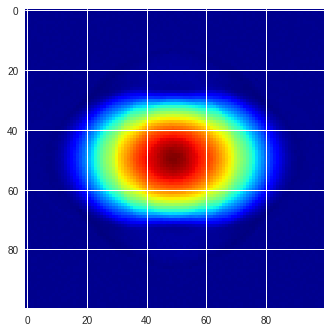

In [17]:
# Predict KERAS SEQUENTIAL
hmm = keras_seq.predict(check.iloc[0:1])
plt.imshow(np.reshape(hmm,(100,100)),cmap = 'jet')

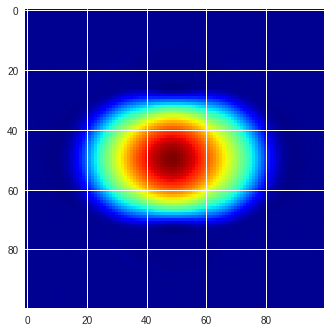

In [18]:
# Predict DCG Model
yea = dcg_model.predict(check.iloc[0:1])
plt.imshow(np.reshape(yea,(100,100)),cmap = 'jet')

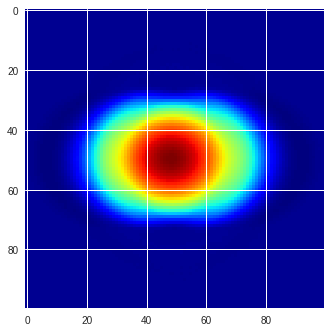

In [19]:
# DCG with lower MSE
yea = dcg_good.predict(check.iloc[0:1])
plt.imshow(np.reshape(yea,(100,100)),cmap = 'jet')